<table align="left">
  <td>
    <a href="https://is.gd/Z5C7xc" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes Neuronales - Regresión Con Tensorflow

Un problema de regresión está enfocado en predecir un número asociado a un problema especifico. 

Por ejemplo, predecir el precio de una casa, predecir el precio de una acción, predecir la cantidad de ventas de un producto, etc.

Ejemplos:
- En cuanto será vendida una casa?
- Cuanto tiempo durará una batería?
- Cuantas personas comprarán un producto?
- Cuanto costará mi seguro medico?
- Cuanto debería guardar cada semana para gasolina?

En **deteccón de objetos**, la regresión es usada para predecir la posición de un objeto en la imagen y la clase del objeto. Por ejemplo, si queremos predecir la posición de un rostro en una imagen y la clase del rostro, la regresión nos dirá la posición de la esquina superior izquierda y la esquina inferior derecha del rostro y la clase del rostro.

> :book: En este notebook se abordaran los siguientes temas:

- Arquitectura de una red neuronal para regresión
- Shapes de entrada y salida de un modelo de regresión
- Crear datos personalizados para visualizar y entrenar un modelo de regresión
- Pasos en la creación de un modelo de regresión
    - Crear un modelo, 
    - Compilar el modelo,
    - Entrenar el modelo,
    - Evaluar el modelo,
- Diferentes metodos de evaluación de un modelo de regresión
- Salvar y cargar un modelo de regresión

[Referencia - Neural Network Regression with TensorFlow](https://is.gd/q7Ap79)

## Arquitectura de una red neuronal para regresión

En la primera imagen se observan los hiperparametros que conforman la arquitectura tipica de red neuronal. 

La segunda imagen muestra la arquitectura basica de una red neuronal para regresión.


<a href="https://ibb.co/g6wZHgF"><img src="https://i.ibb.co/SJ0wWv7/parametros-NN.png" alt="parametros-NN" border="0"></a>

<a href=""><img src="https://is.gd/HS4TNP" alt="NN" border="0"></a>

In [113]:
# importar TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Crear datos personalizados para visualizar y entrenar un modelo de regresión

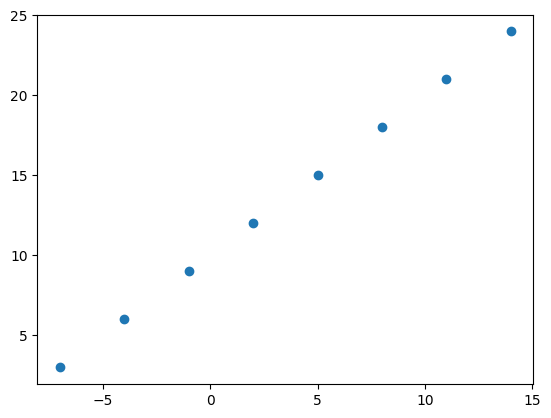

In [114]:
import numpy as np
import matplotlib.pyplot as plt

# crear las características -
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
# crear las etiquetas
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualizar los datos

plt.scatter(X, y)

## Shapes de entradas y salidas (X, y)



In [115]:
# Crear un tensor demo con las caracteristicas para predicción del problema del precio de la casa

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [116]:
X[0], y[0]

(-7.0, 3.0)

In [117]:
# shape de los datos creados
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [118]:
# Convertir los array de NumPy a tensores de TensorFlow

X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [119]:
# shape de los datos convertidos a tensores
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

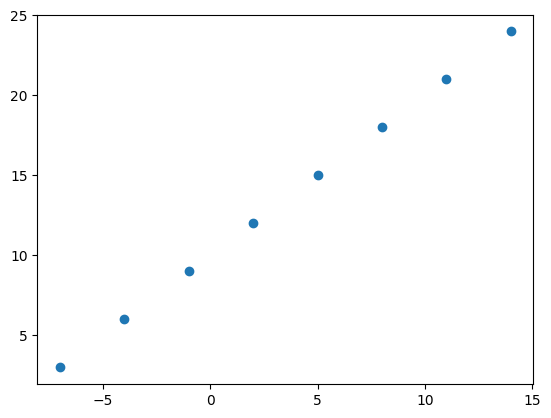

In [120]:
plt.scatter(X, y)

## Pasos para crear un modelo utilizando Tensorflow

1. **Crear un modelo** - Definir la arquitectura de la red neuronal: 
    - Capas de entrada
    - Capas ocultas
    - Capas de salida
2. **Compilar el modelo** - Definir la función de perdida, el optimizador y las métricas de evaluación. 
3. **Entrenar el modelo** - Ajustar el modelo a los datos de entrenamiento. (X,y) o (Features, Labels)

In [121]:
# Set the random seed
tf.random.set_seed(42)
# 1. Crear un modelo usando la API secuencial
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Entrenar el modelo
#history = model.fit(X, y, epochs=5)
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=10) # <- updated line

# 4. Evaluar el modelo
model.evaluate(X, y)

Epoch 1/10
1/1 [==============================] - 0s 173ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/10
1/1 [==============================] - 0s 5ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/10
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/10
1/1 [==============================] - 0s 72ms/step - loss: 10.1798 - mae: 10.1798


[10.179789543151855, 10.179789543151855]

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 0, 'epochs')

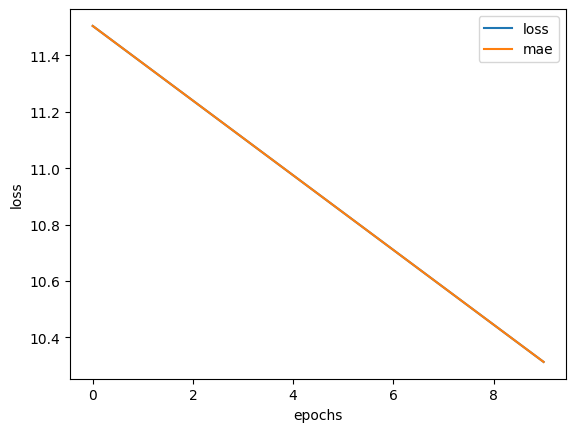

In [123]:
# Graficar el historico del entrenamiento del modelo 
import pandas as pd
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


In [124]:
# Recordemos los valores de X y y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [125]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 10.18
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[15.741023]], dtype=float32)

## Mejorando el desempaño del modelo

Para mejorar el desempeño del modelo se pueden realizar las siguientes acciones:

- **Aumentar el número de neuronas en las capas ocultas** - Aumentar el número de neuronas en las capas ocultas puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el número de capas ocultas** - Aumentar el número de capas ocultas puede ayudar a que el modelo aprenda patrones más complejos.
- **Cambiar la función de activación** - Cambiar la función de activación puede ayudar a que el modelo aprenda patrones más complejos.
- **Cambiar el optimizador** - Cambiar el optimizador puede ayudar a que el modelo converja más rápido.
- **Aumentar el número de epochs** - Aumentar el número de epochs puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño del batch** - Aumentar el tamaño del batch puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de entrenamiento** - Aumentar el tamaño de los datos de entrenamiento puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de validación** - Aumentar el tamaño de los datos de validación puede ayudar a que el modelo aprenda patrones más complejos.
- **Aumentar el tamaño de los datos de prueba** - Aumentar el tamaño de los datos de prueba puede ayudar a que el modelo aprenda patrones más complejos.


### :lab_coat: Experimento 1. 

- Aumentar el número de epocas (epochs)

In [126]:
# 1. Crear un modelo
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 66ms/step - loss: 6.8813 - mae: 6.8813


[6.881250381469727, 6.881250381469727]

In [127]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 6.88
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

### :lab_coat: Experimento 2. 

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas

In [128]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 72ms/step - loss: 4.9488 - mae: 4.9488


[4.948764801025391, 4.948764801025391]

### :lab_coat: Experimento 3. 

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU

In [129]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 70ms/step - loss: 3.6933 - mae: 3.6933


[3.6933133602142334, 3.6933133602142334]

### :lab_coat: Experimento 4.

- Aumentar el número de capas ocultas
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU
- Cambiar el optimizador SGD a Adam con lr=0.01

In [130]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)


model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = None),
    
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 71ms/step - loss: 0.1605 - mae: 0.1605


[0.16051650047302246, 0.16051650047302246]

In [131]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 0.16
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[27.217045]], dtype=float32)

### :lab_coat: Experimento 5.

- Aumentar el número de capas ocultas (3)
- Aumentar el número de neuronas en las capas ocultas
- Seleccionar una función de activación diferente - ReLU
- Cambiar el optimizador SGD a Adam con lr= 0.01

In [132]:
# 1. Crear un modelo
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose = 0)

# 4. Evaluar el modelo
model.evaluate(tf.expand_dims(X, axis=-1), y)

1/1 [==============================] - 0s 78ms/step - loss: 1.0925 - mae: 1.0925


[1.092536449432373, 1.092536449432373]

In [133]:
# Realizar una predicción con el modelo entrenado
# Para 17.0 el valor esperado es 27.0. El resultado de la evaluación del modelo muestra un error MAE de 6.88
# Por lo tanto la predicción del modelo presenta un error cercano al valor resultante del MAE. 

y_pred = model.predict([17.0])
y_pred

array([[24.910385]], dtype=float32)

## Evaluación del modelo

En practica, el workflow típico cuando se construye una red neuronal es:

```
Crear un modelo -> Compilar el modelo -> Entrenar el modelo -> Evaluar el modelo -> Ajustar el modelo 
Entrenar el modelo -> Evaluar el modelo -> Ajustar el modelo ...
```

> Cuando se evalua un modelo es importante la visualización de los resultados.

- Visualización de los datos de entrenamiento y validación
- Visualización de la estructura del modelo
- Visualización de los resultados de entrenamiento y validación
- Visualización de los resultados de prueba
- Visualización de las predicciones

In [134]:
# Crear un dataset mas grande

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [135]:
# Crear Labels para el dataset

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

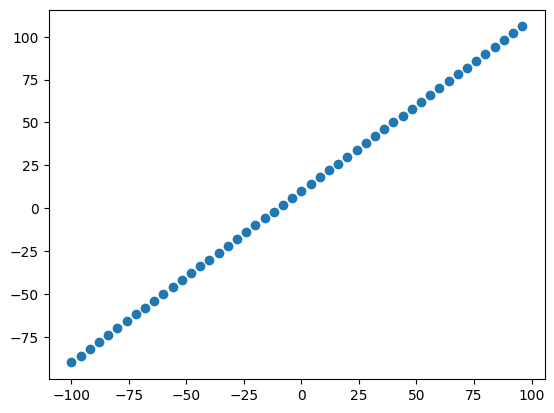

In [136]:
plt.scatter(X, y)

### Los 3 tipos de split de datos...

- **Entrenamiento** (Training Set) - El conjunto de datos que se utiliza para entrenar el modelo. Se asigna entre el 70 - 80% de los datos.
- **Validación** (Validation Set) - El conjunto de datos que se utiliza para evaluar el modelo durante el entrenamiento. Se asigna entre el 10 - 20% de los datos.
- **Prueba** (Test Set)- El conjunto de datos que se utiliza para evaluar el modelo después del entrenamiento. Se asigna entre el 10 - 20% de los datos.


In [137]:
len(X)

50

In [138]:
# Separar el dataset en train y test

X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizar el dataset

Visualizar el dataset es una buena práctica para entender los datos y los patrones que se pueden encontrar en ellos.

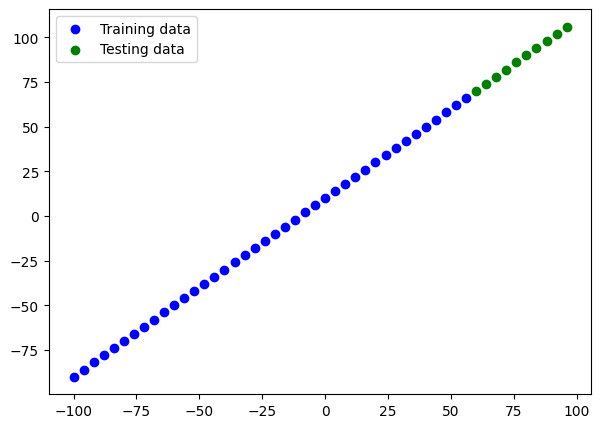

In [139]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')

# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')

# Show a legend
plt.legend();

In [140]:
# 1. Crear un modelo
tf.keras.backend.clear_session()

tf.random.set_seed(42)

# Es necesario definir el input_shape en la primera capa del modelo para que el modelo sepa que esperar de los datos de entrada. 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation = 'relu', input_shape=[1], name = 'hidden_layer'),
    tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ["mae"])

In [141]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 50)                100       
_________________________________________________________________
output_layer (Dense)         (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - Número total de parámetros del modelo.
* Trainable params - Número de parámetros que se pueden actualizar durante el entrenamiento.
* Non-trainable params - Número de parámetros que no se pueden actualizar durante el entrenamiento. (Se utiliza comumente para transfer learning).

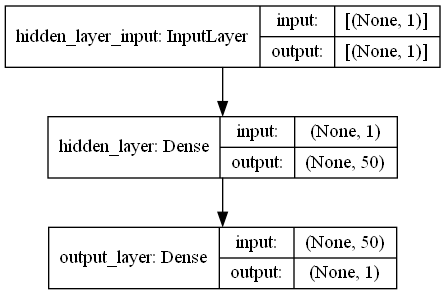

In [142]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)


In [143]:
# 3. Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose = 0)

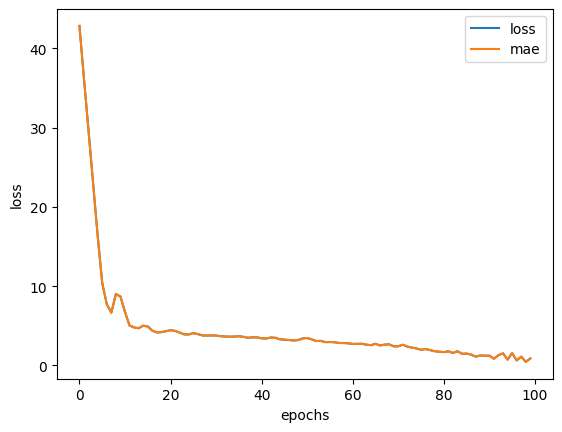

In [144]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### Visualizar las predicciones del modelo

In [145]:
# Realizar una predicción con el modelo entrenado
y_pred = model.predict(X_test)

In [146]:
# Crear una función para visualizar los resultados de la predicción

def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_pred):
    plt.figure(figsize=(7, 5))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', label='Training data')

    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', label='Testing data')

    # Plot the model's predictions in red
    plt.scatter(test_data, predictions, c='r', label='Predictions')

    # Show a legend
    plt.legend();

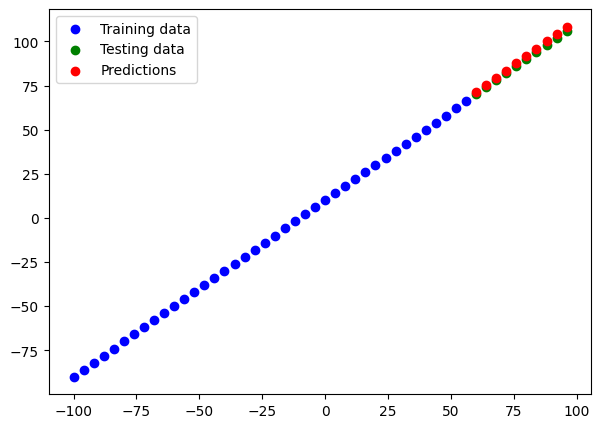

In [147]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

## Evaluación de las predicciones

Dependiendo del problema que se este resolviendo, se puede utilizar una métrica de evaluación diferente.

Dado que estamos trabajando con regresión, las métricas de evaluación que se pueden utilizar son:

- **Mean Absolute Error (MAE)** - Es la media del valor absoluto de los errores. Es la métrica más fácil de entender, ya que es el error promedio.
- **Mean Squared Error (MSE)** - Es la media de los errores al cuadrado. MSE es más popular que MAE, ya que MSE "castiga" los errores más grandes, lo que tiende a ser útil en el mundo real.
- **Root Mean Squared Error (RMSE)** - Es la raíz cuadrada de la media de los errores al cuadrado. Es interpretable en las mismas unidades que los objetivos.
- **Huber** - Es similar a MSE, pero no es tan sensible a los errores extremos en los datos.

<a href=""><img src="https://tinyurl.com/2mk4al2n" alt="metrics" border="0"></a>
<a href="https://ibb.co/b3pMH2W"><img src="https://i.ibb.co/j57PVW6/imagen-2022-12-03-215713895.png" alt="imagen-2022-12-03-215713895" border="0"></a>


In [148]:
# 4. Evaluar el modelo
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 72ms/step - loss: 1.6859 - mae: 1.6859


[1.685888648033142, 1.685888648033142]

In [149]:
# El tensor y_pred tiene una dimension extra. Por lo tanto para compararlos es necesario que ambos tengan la misma dimension.
# Para ello se utiliza la función squeeze() que elimina las dimensiones de tamaño 1 de un tensor.
tf.constant(y_pred), y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[ 71.16125 ],
        [ 75.265205],
        [ 79.369156],
        [ 83.47312 ],
        [ 87.590416],
        [ 91.72693 ],
        [ 95.86344 ],
        [ 99.99995 ],
        [104.13645 ],
        [108.27297 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>)

In [150]:
# Calcular el Mean Squared Error (MSE) y el Mean Absolute Error (MAE)

mae = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_pred))
mse = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_pred))
mae.numpy(), mse.numpy()

(1.6858886, 2.9708648)

In [151]:
# Calcular el Mean Squared Error (MSE) y el Mean Absolute Error (MAE) con la función mean_absolute_error() y mean_squared_error() de sklearn

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae, mse

(1.685888671875, 2.9708649373846128)

## Realizar Experimentos para mejorar el modelo

- model_1 - mismo que el original, 1 capa, entrenado con 100 epocas.
- model_2 - 2 capas, entrenado con 100 epocas.
- model_3 - 2 capas, entrenado con 500 epocas.

### :lab_coat: Experimento 1. 

- model_1 - mismo que el original, 1 capa, entrenado con 100 epocas.

In [152]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_1 = tf.keras.Sequential([
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Entrenar el modelo
history = model_1.fit(X_train, y_train, epochs=100, verbose = 0)

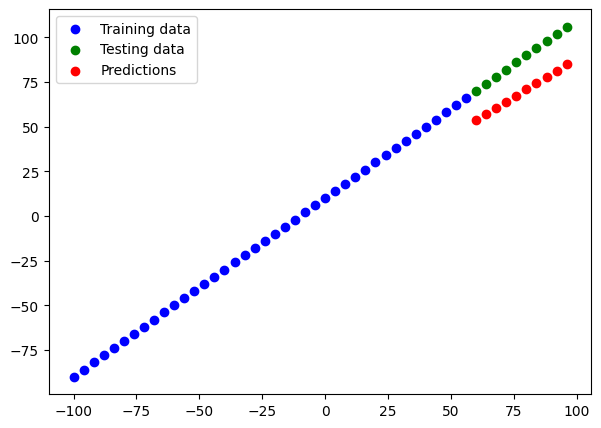

In [153]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [154]:
mae_1 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_1)).numpy()
mse_1 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_1)).numpy()
mae_1, mse_1

(18.745327, 353.5734)

### :lab_coat: Experimento 2. 

- model_2 - 2 capas, entrenado con 100 epocas.

In [155]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_2 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer'),
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo

history = model_2.fit(X_train, y_train, epochs=100, verbose = 0)

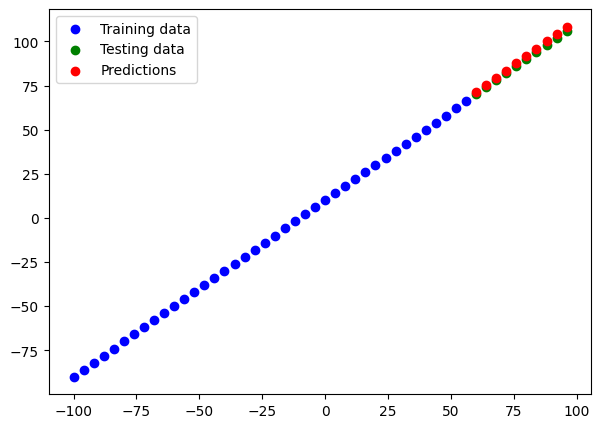

In [156]:
# Make and plot predictions for model_1
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [157]:
# metricas del modelo 2 mae, mse

mae_2 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_2)).numpy()
mse_2 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_2)).numpy()
mae_2, mse_2

(1.6858886, 2.9708648)

### :lab_coat: Experimento 3. 

- model_3 - 2 capas, entrenado con 500 epocas.

In [158]:
tf.random.set_seed(42)

# 1. Crear un modelo
model_3 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer'),
        tf.keras.layers.Dense(50, activation = 'relu', name = 'hidden_layer_2'),
        tf.keras.layers.Dense(1, name = 'output_layer')
])

# 2. Compilar el modelo

model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics = ["mae"])

# 3. Entrenar el modelo

history = model_3.fit(X_train, y_train, epochs=500, verbose = 0)

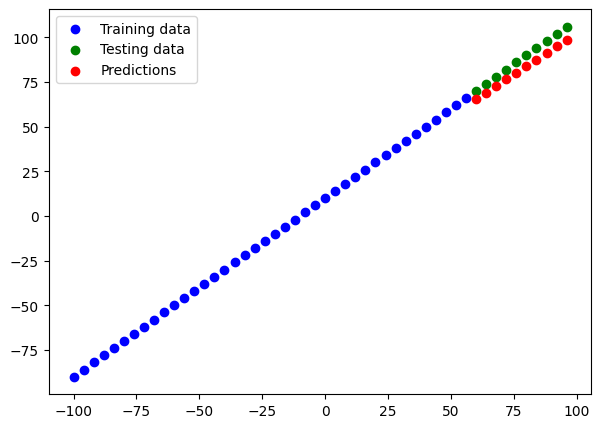

In [159]:
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [160]:
# metricas del modelo 3 mae, mse

mae_3 = tf.metrics.mean_absolute_error(y_true =y_test, y_pred = tf.squeeze(y_preds_3)).numpy()
mse_3 = tf.metrics.mean_squared_error(y_true =y_test, y_pred = tf.squeeze(y_preds_3)).numpy()
mae_3, mse_3

(5.9214225, 35.68487)

### Comparar los resultados de los modelos

In [161]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [162]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573395
1,model_2,1.685889,2.970865
2,model_3,5.921422,5.921422


## Guardar y cargar un modelo